In [2]:
# Imports and setup
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = (10, 6) 

In [3]:
# Loading the movies dataset into df1 and printing it to show the result.
df1 = pd.read_csv(r"D:\Movies_Cleaned_Data.csv")
display(df1)

,Unnamed: 0,director_name,num_critic_for_reviews,director_likes,Actress_Name,Actress_likes,Actor_Name,Actor_1_likes,actor_1_name,actor_1_likes,...,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,Popularity
0,0,James Cameron,723.0,64753.0,Wes Studi,855.0,Joel David Moore,936.0,CCH Pounder,1000.0,...,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000
1,1,Gore Verbinski,302.0,563.0,Jack Davenport,1000.0,Orlando Bloom,5000.0,Johnny Depp,40000.0,...,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35,0
2,2,Sam Mendes,602.0,0.0,Stephanie Sigman,161.0,Rory Kinnear,393.0,Christoph Waltz,11000.0,...,11700,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000
3,3,Christopher Nolan,813.0,22000.0,Joseph Gordon-Levitt,23000.0,Christian Bale,23000.0,Tom Hardy,27000.0,...,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000
4,4,Doug Walker,570.0,131.0,NaN,NaN,Rob Walker,12.0,Doug Walker,131.0,...,143,NaN,English,USA,NaN,NaN,NaN,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5038,Scott Smith,1.0,2.0,Crystal Lowe,318.0,Daphne Zuniga,470.0,Eric Mabius,637.0,...,2283,6.0,English,Canada,NaN,NaN,2013.0,7.7,NaN,84
5039,5039,NaN,43.0,NaN,Sam Underwood,319.0,Valorie Curry,593.0,Natalie Zea,841.0,...,1753,359.0,English,USA,TV-14,NaN,NaN,7.5,16.00,32000
5040,5040,Benjamin Roberds,13.0,0.0,David Chandler,0.0,Maxwell Moody,0.0,Eva Boehnke,0.0,...,0,3.0,English,USA,NaN,1400.0,2013.0,6.3,NaN,16
5041,5041,Daniel Hsia,14.0,0.0,Eliza Coupe,489.0,Daniel Henney,719.0,Alan Ruck,946.0,...,2386,9.0,English,USA,PG-13,NaN,2012.0,6.3,2.35,660


In [4]:
# First thing we did is describing the dataset to check the values. We used pd.option to show all of the columns without skipping
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df1.describe(include="all"))

,Unnamed: 0,director_name,num_critic_for_reviews,director_likes,Actress_Name,Actress_likes,Actor_Name,Actor_1_likes,actor_1_name,actor_1_likes,gross,Movie Name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,Popularity
count,5043.000000,4939,4994.000000,4939.000000,5020,5020.000000,5030,5030.000000,5036,5036.000000,4.159000e+03,5043,5.043000e+03,5043.000000,5022.000000,5043,5043,4740,4.551000e+03,4935.000000,5043.000000,4714.000000,5043.000000
unique,NaN,2398,NaN,NaN,3521,NaN,3032,NaN,2097,NaN,NaN,4917,NaN,NaN,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN
top,NaN,Steven Spielberg,NaN,NaN,John Heard,NaN,Morgan Freeman,NaN,Robert De Niro,NaN,NaN,Ben-HurÃ‚Â,NaN,NaN,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN
freq,NaN,26,NaN,NaN,8,NaN,20,NaN,49,NaN,NaN,3,NaN,NaN,NaN,4716,3812,2118,NaN,NaN,NaN,NaN,NaN
mean,2521.000000,NaN,140.280336,699.619761,NaN,645.009761,NaN,1651.754473,NaN,6560.047061,4.846841e+07,NaN,8.366816e+04,9699.063851,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,6.442138,2.220403,7525.964505
std,1455.933034,NaN,121.741517,2957.323205,NaN,1665.041728,NaN,4042.438863,NaN,15020.759120,6.845299e+07,NaN,1.384853e+05,18163.799124,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,1.125116,1.385113,19320.445110
min,0.000000,NaN,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,1.620000e+02,NaN,5.000000e+00,0.000000,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,1.600000,1.180000,0.000000
25%,1260.500000,NaN,50.000000,7.000000,NaN,133.000000,NaN,281.000000,NaN,614.000000,5.340988e+06,NaN,8.593500e+03,1411.000000,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,5.800000,1.850000,0.000000
50%,2521.000000,NaN,110.000000,49.000000,NaN,371.500000,NaN,595.000000,NaN,988.000000,2.551750e+07,NaN,3.435900e+04,3090.000000,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,6.600000,2.350000,166.000000
75%,3781.500000,NaN,195.000000,195.000000,NaN,636.000000,NaN,918.000000,NaN,11000.000000,6.230944e+07,NaN,9.630900e+04,13756.500000,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,7.200000,2.350000,3000.000000


In [5]:
# Checking for duplicate rows and printing it to show the result.
duplicateRowsDF = df1[df1.duplicated()] 
display(duplicateRowsDF)


,Unnamed: 0,director_name,num_critic_for_reviews,director_likes,Actress_Name,Actress_likes,Actor_Name,Actor_1_likes,actor_1_name,actor_1_likes,...,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,Popularity


In [6]:
# Updating df1 without the duplicates rows and printing it to show the result.
df1 = df1.drop_duplicates(subset=None, keep="first", inplace=False)
df1 = df1.reset_index(drop=True)
df1

,Unnamed: 0,director_name,num_critic_for_reviews,director_likes,Actress_Name,Actress_likes,Actor_Name,Actor_1_likes,actor_1_name,actor_1_likes,...,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,Popularity
0,0,James Cameron,723.0,64753.0,Wes Studi,855.0,Joel David Moore,936.0,CCH Pounder,1000.0,...,4834,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000
1,1,Gore Verbinski,302.0,563.0,Jack Davenport,1000.0,Orlando Bloom,5000.0,Johnny Depp,40000.0,...,48350,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35,0
2,2,Sam Mendes,602.0,0.0,Stephanie Sigman,161.0,Rory Kinnear,393.0,Christoph Waltz,11000.0,...,11700,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000
3,3,Christopher Nolan,813.0,22000.0,Joseph Gordon-Levitt,23000.0,Christian Bale,23000.0,Tom Hardy,27000.0,...,106759,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000
4,4,Doug Walker,570.0,131.0,NaN,NaN,Rob Walker,12.0,Doug Walker,131.0,...,143,NaN,English,USA,NaN,NaN,NaN,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5038,Scott Smith,1.0,2.0,Crystal Lowe,318.0,Daphne Zuniga,470.0,Eric Mabius,637.0,...,2283,6.0,English,Canada,NaN,NaN,2013.0,7.7,NaN,84
5039,5039,NaN,43.0,NaN,Sam Underwood,319.0,Valorie Curry,593.0,Natalie Zea,841.0,...,1753,359.0,English,USA,TV-14,NaN,NaN,7.5,16.00,32000
5040,5040,Benjamin Roberds,13.0,0.0,David Chandler,0.0,Maxwell Moody,0.0,Eva Boehnke,0.0,...,0,3.0,English,USA,NaN,1400.0,2013.0,6.3,NaN,16
5041,5041,Daniel Hsia,14.0,0.0,Eliza Coupe,489.0,Daniel Henney,719.0,Alan Ruck,946.0,...,2386,9.0,English,USA,PG-13,NaN,2012.0,6.3,2.35,660


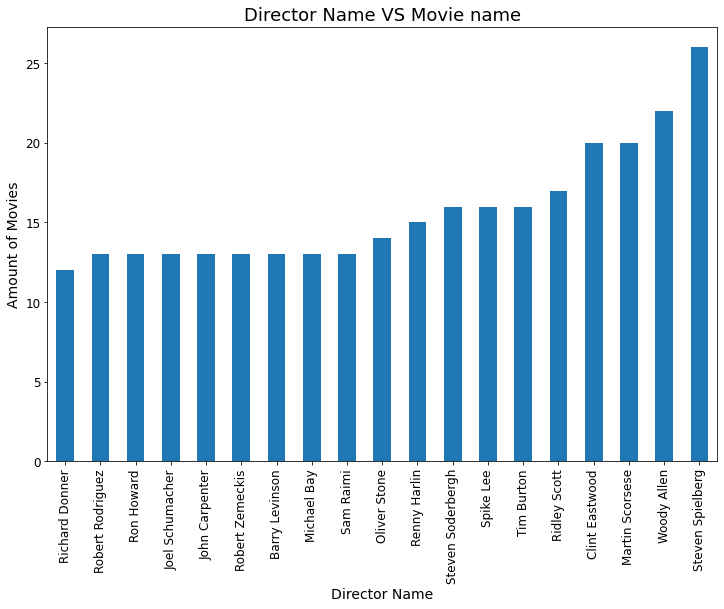

In [7]:
# After fixing the values, we'll start showing several plots to understand the values.
# In this cell, we plotted the relation between director name and amount of movies
fig, ax = plt.subplots(figsize=(12,8))
df1.groupby(by="director_name")["Movie Name"].count().sort_values()[2379:2398].plot(kind="bar", fontsize=12)
plt.title("Director Name VS Movie name", fontsize=18)
plt.xlabel("Director Name", fontsize=14)
plt.ylabel("Amount of Movies", fontsize=14)
plt.show()

# As we can see below, Steven Spielberg is in the first place.

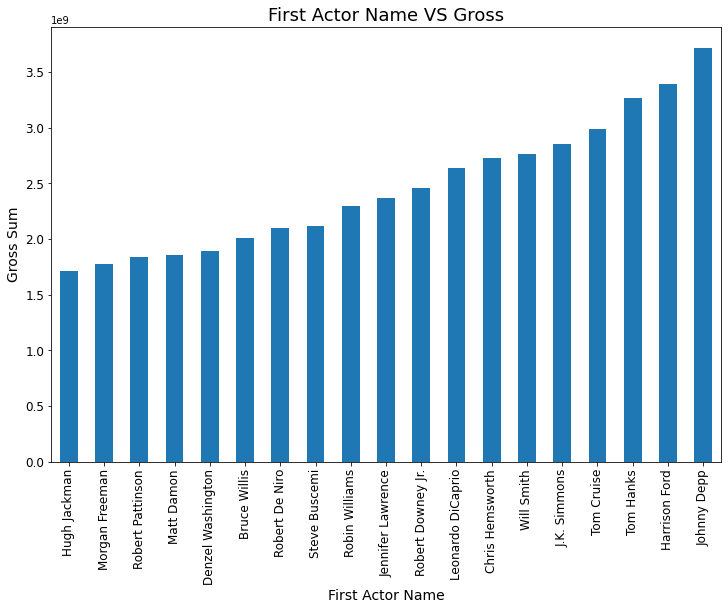

In [8]:
# A plot of the relation between first actor name and movie's gross
fig, ax = plt.subplots(figsize=(12,8))
df1.groupby(by="actor_1_name")["gross"].sum().sort_values()[2078:2098].plot(kind="bar", fontsize=12)
plt.title("First Actor Name VS Gross", fontsize=18)
plt.xlabel("First Actor Name", fontsize=14)
plt.ylabel("Gross Sum", fontsize=14)
plt.show()


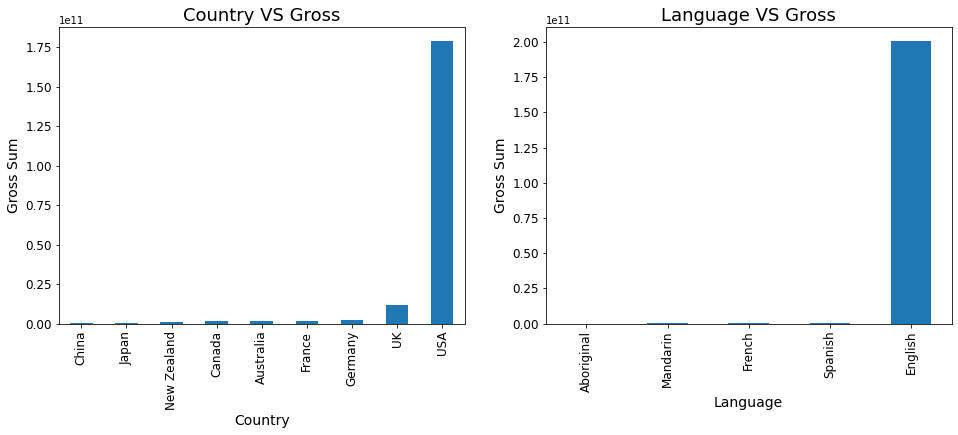

In [9]:
# Two plots of the relation between county and gross, language and gross
fig, ax = plt.subplots(figsize=(16,12))

plt.subplot(2, 2, 1)
df1.groupby(by="country")["gross"].sum().sort_values()[56:66].plot(kind="bar", fontsize=12)
plt.title("Country VS Gross", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Gross Sum", fontsize=14)

plt.subplot(2, 2, 2)
df1.groupby(by="language")["gross"].sum().sort_values()[42:47].plot(kind="bar", fontsize=12)
plt.title("Language VS Gross", fontsize=18)
plt.xlabel("Language", fontsize=14)
plt.ylabel("Gross Sum", fontsize=14)
plt.show()


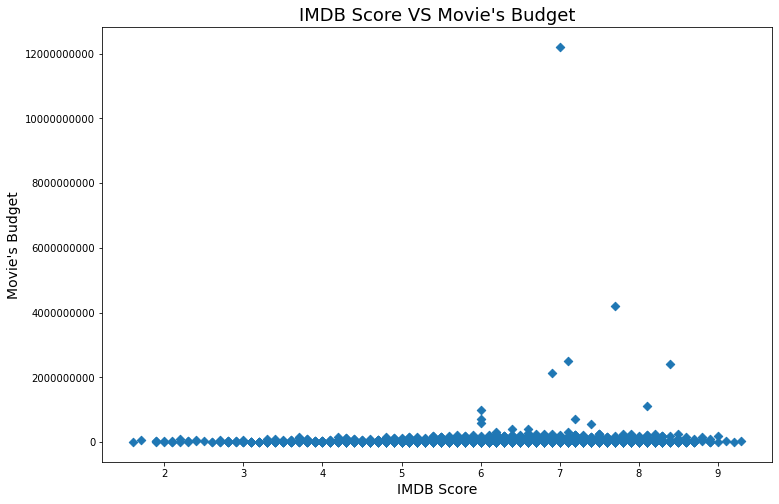

In [10]:
# A plot of the relation between IMDB Score and a movie's budget
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=df1["imdb_score"], y=df1["budget"], marker="D")
plt.ticklabel_format(style="plain")
plt.title("IMDB Score VS Movie's Budget", fontsize=18)
plt.xlabel("IMDB Score", fontsize=14)
plt.ylabel("Movie's Budget", fontsize=14)
plt.show()

In [11]:
# Fixing the missing values with filling None in any Nan category feature and 0.0 or mean in any numeric feature.
df1["director_name"] = df1["director_name"].fillna("None")

df1["actor_1_name"] = df1["actor_1_name"].fillna("None")

df1["budget"] = df1["budget"].fillna(df1["budget"].mean()).astype(np.int)
df1["gross"] = df1["gross"].fillna(0.0).astype(np.float)
df1["num_critic_for_reviews"] = df1["num_critic_for_reviews"].fillna(0.0).astype(np.float)
df1["num_user_for_reviews"] = df1["num_user_for_reviews"].fillna(0.0).astype(np.float)

df1["language"] = df1["language"].fillna("None")
df1["country"] = df1["country"].fillna("None")
df1["title_year"] = df1["title_year"].fillna(df1["title_year"].mean()).astype(np.int)

# Describing df1 again to show the result
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df1.describe(include="all"))

C:\Users\tisud\AppData\Local\Temp\ipykernel_7732\2313357399.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1["budget"] = df1["budget"].fillna(df1["budget"].mean()).astype(np.int)
C:\Users\tisud\AppData\Local\Temp\ipykernel_7732\2313357399.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and g

,Unnamed: 0,director_name,num_critic_for_reviews,director_likes,Actress_Name,Actress_likes,Actor_Name,Actor_1_likes,actor_1_name,actor_1_likes,gross,Movie Name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,Popularity
count,5043.000000,5043,5043.000000,4939.000000,5020,5020.000000,5030,5030.000000,5043,5036.000000,5.043000e+03,5043,5.043000e+03,5043.000000,5043.000000,5043,5043,4740,5.043000e+03,5043.00000,5043.000000,4714.000000,5043.000000
unique,NaN,2399,NaN,NaN,3521,NaN,3032,NaN,2098,NaN,NaN,4917,NaN,NaN,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN
top,NaN,None,NaN,NaN,John Heard,NaN,Morgan Freeman,NaN,Robert De Niro,NaN,NaN,Ben-HurÃ‚Â,NaN,NaN,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,8,NaN,20,NaN,49,NaN,NaN,3,NaN,NaN,NaN,4716,3812,2118,NaN,NaN,NaN,NaN,NaN
mean,2521.000000,NaN,138.917311,699.619761,NaN,645.009761,NaN,1651.754473,NaN,6560.047061,3.997226e+07,NaN,8.366816e+04,9699.063851,271.634940,NaN,NaN,NaN,3.382253e+07,2002.46044,6.442138,2.220403,7525.964505
std,1455.933034,NaN,121.927628,2957.323205,NaN,1665.041728,NaN,4042.438863,NaN,15020.759120,6.483779e+07,NaN,1.384853e+05,18163.799124,377.603767,NaN,NaN,NaN,8.340941e+07,12.34046,1.125116,1.385113,19320.445110
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000e+00,NaN,5.000000e+00,0.000000,0.000000,NaN,NaN,NaN,-2.147484e+09,1916.00000,1.600000,1.180000,0.000000
25%,1260.500000,NaN,48.000000,7.000000,NaN,133.000000,NaN,281.000000,NaN,614.000000,3.037815e+05,NaN,8.593500e+03,1411.000000,64.000000,NaN,NaN,NaN,7.000000e+06,1999.00000,5.800000,1.850000,0.000000
50%,2521.000000,NaN,109.000000,49.000000,NaN,371.500000,NaN,595.000000,NaN,988.000000,1.527968e+07,NaN,3.435900e+04,3090.000000,155.000000,NaN,NaN,NaN,2.300000e+07,2005.00000,6.600000,2.350000,166.000000
75%,3781.500000,NaN,194.000000,195.000000,NaN,636.000000,NaN,918.000000,NaN,11000.000000,5.135707e+07,NaN,9.630900e+04,13756.500000,324.000000,NaN,NaN,NaN,4.000000e+07,2011.00000,7.200000,2.350000,3000.000000


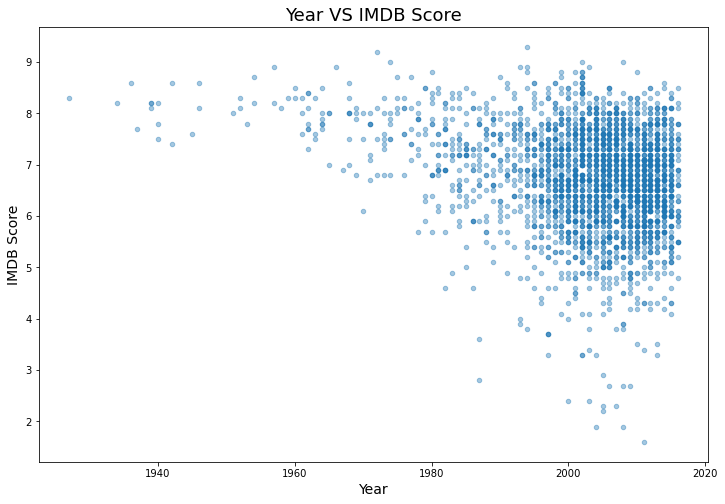

In [12]:
# A plot of the relation between year and IMDB score
major_movies = df1[df1["num_voted_users"] >= 25000]
major_movies.plot.scatter("title_year", "imdb_score", figsize=(12, 8), alpha=0.4)
plt.title("Year VS IMDB Score", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("IMDB Score", fontsize=14)
plt.show()


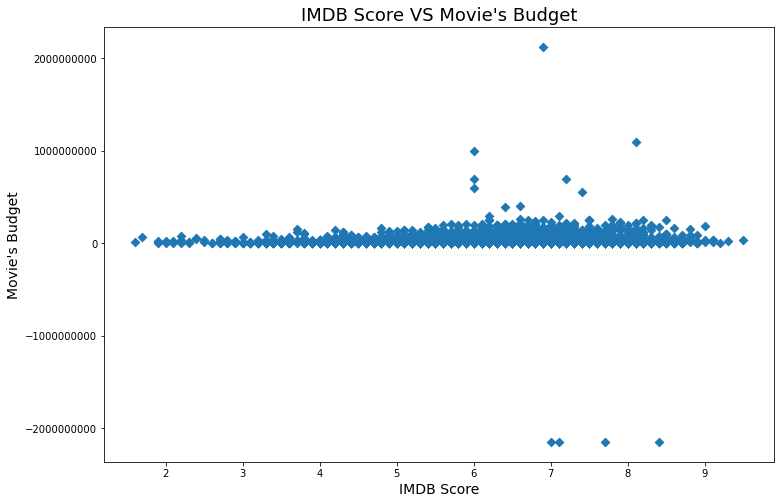

In [13]:
# A plot of the relation between IMDB Score and a movie's budget
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x=df1["imdb_score"], y=df1["budget"], marker="D")
plt.ticklabel_format(style="plain")
plt.title("IMDB Score VS Movie's Budget", fontsize=18)
plt.xlabel("IMDB Score", fontsize=14)
plt.ylabel("Movie's Budget", fontsize=14)
plt.show()

In [19]:
# Setting DF3
df3 = df1[["title_year","budget", "gross", "cast_total_facebook_likes", "num_user_for_reviews"]]

In [20]:
# Setting our X as lables (all our features and data) and y as our target (IMDB score).
y = np.array(df1["imdb_score"], dtype=int)
print("Minimum value:", np.min(y))
print("Median value:", np.median(y))
print("Maximum value:", np.max(y))

X = np.array(df3.values, dtype=int)

Minimum value: 1
Median value: 6.0
Maximum value: 9


Accuracy with k=3 is: 0.29633300297324083
knn (k=1) Accuracy: 0.30426164519326065, train accuracy: 1.0
knn (k=3) Accuracy: 0.29633300297324083, train accuracy: 0.590233019335647
knn (k=5) Accuracy: 0.3290386521308226, train accuracy: 0.5205751115518096
knn (k=7) Accuracy: 0.3240832507433102, train accuracy: 0.49082796232027764
knn (k=9) Accuracy: 0.3518334985133796, train accuracy: 0.4695091720376797
knn (k=11) Accuracy: 0.33498513379583744, train accuracy: 0.4593455627169063
knn (k=13) Accuracy: 0.33597621407333994, train accuracy: 0.4516608824987605
knn (k=15) Accuracy: 0.34291377601585726, train accuracy: 0.45463559742191373


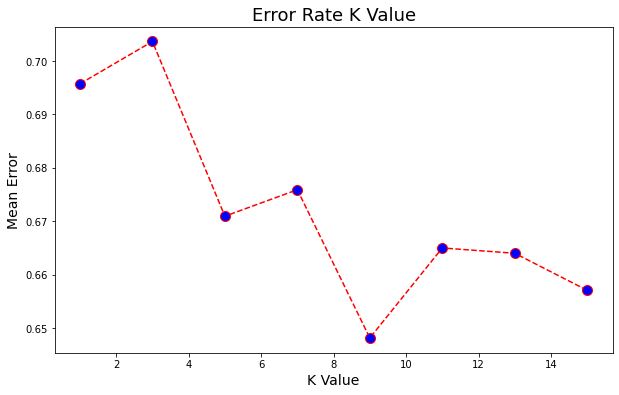

In [21]:
# First of all, we developed a k-NN classification model for the data:

# Imports and setup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Split dataset into train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create k-NN classifier with n_neighbors=3.
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data.
knn.fit(X_train, y_train)

# Check accuracy of our model on the test data.
print("Accuracy with k=3 is:", knn.score(X_test, y_test))

# Secondly, we checked which value of k between 1 to 17 step 2 is the best choise of n_neighbors and printed the results.
for k in range(1, 17, 2):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    acc = knn2.score(X_test, y_test)
    acc_tr = knn2.score(X_train, y_train)
    print("knn (k={}) Accuracy: {}, train accuracy: {}".format(k, acc, acc_tr))

# Thirdly, we calculated the error for k values between 1 to 17 step 2.
error = []
# Calculating error for k values between 1 to 17 step 2.
for k in range(1, 17, 2):
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X_train, y_train)
    pred_k = knn3.predict(X_test)
    error.append(np.mean(pred_k != y_test))

# We used a plot to describe the error from above.
plt.figure(figsize=(10,6))
plt.title("Error Rate K Value", fontsize=18)  
plt.xlabel("K Value", fontsize=14)  
plt.ylabel("Mean Error", fontsize=14)
plt.plot(range(1, 17, 2), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10);

# As we can infer from the output below (text and plot), the best k value between 1 to 17 step 2 is 15.
# It's accurary value is the highest and it's error is the lowest.

In [22]:
# In this cell we did a cross validation using Grid Search to find the best k between 1 to 29.

# We created a dictionary with a key and a value to be k values.
k_range = list(range(1, 31, 2))

param_grid = dict(n_neighbors=k_range)

# Grid search to the data.
grid = GridSearchCV(knn, param_grid, scoring="accuracy", cv=5, return_train_score=True)

# Fit the grid to the data.
grid.fit(X_train, y_train)

# Print the best parameters to show the result.
print("The best parameter set found on development set is:", grid.best_params_)

# Getting the mean values of grid search.
means = grid.cv_results_["mean_test_score"]

# Print the grid scores to show the result.
print("\nGrid scores on development set:")
for mean, params in zip(means, grid.cv_results_["params"]):
    print("mean:", mean, "   parameters:", params)

D:\TISU\1_TISU\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


The best parameter set found on development set is: {'n_neighbors': 27}

Grid scores on development set:
mean: 0.2992048483953988    parameters: {'n_neighbors': 1}
mean: 0.26375695296429197    parameters: {'n_neighbors': 3}
mean: 0.31556480055100994    parameters: {'n_neighbors': 5}
mean: 0.32077356628262016    parameters: {'n_neighbors': 7}
mean: 0.3329176160211057    parameters: {'n_neighbors': 9}
mean: 0.344819983949376    parameters: {'n_neighbors': 11}
mean: 0.35398544374440766    parameters: {'n_neighbors': 13}
mean: 0.35051611058326493    parameters: {'n_neighbors': 15}
mean: 0.35448602642510785    parameters: {'n_neighbors': 17}
mean: 0.36142838254602255    parameters: {'n_neighbors': 19}
mean: 0.36192558291131266    parameters: {'n_neighbors': 21}
mean: 0.3626666174693516    parameters: {'n_neighbors': 23}
mean: 0.3666331509957844    parameters: {'n_neighbors': 25}
mean: 0.3691133106410717    parameters: {'n_neighbors': 27}
mean: 0.3663871644205018    parameters: {'n_neighbors

In [23]:
# In the next 2 cells, we used decision tree classifier

# Imports and setup
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import pydotplus
from IPython.display import Image

# Hacky solution of writing to files and reading again. necessary due to library bugs.
def renderTree(my_tree, features):
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Rating 1", "Rating 2", "Rating 3", "Rating 4", "Rating 5", "Rating 6", "Rating 7", "Rating 8" ,"Rating 9"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()
    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))


In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Classifier to the data with max_depth=3.
decisionTree = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

# Splitting into test and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fitting the tree with the training data.
decisionTree = decisionTree.fit(X_train, y_train)

# Predict with the training data.
y_pred_train = decisionTree.predict(X_train)

# Print the result of measure accuracy.
print("The accuracy on training data is:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train))

# Predict with the testing data.
y_pred = decisionTree.predict(X_test)

# Print the result of measure accuracy.
print("The accuracy on testing data is:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
renderTree(my_tree=decisionTree, features=df3.columns)

The accuracy on training data is: 0.42389687654933067
The accuracy on testing data is: 0.377601585728444


InvocationException: GraphViz's executables not found

In [84]:
from flask import Flask,request,jsonify
from flask_cors import CORS
import recommendation

In [27]:
# In the next cells we used k-means to cluster the movies into four clusters.

# imports and setup 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Storing all the df3 values into X
X = df3.values

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the model
y_pred = KMeans(n_clusters=2, n_init=1, max_iter=600).fit_predict(X_scaled)

# View in a scatter
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 2], X[:, 5], c=y_pred, marker="o", s=50);

# X axis = director_facebook_likes
# Y axis = movie's gross
print(X.shape)

IndexError: index 5 is out of bounds for axis 1 with size 5

<Figure size 864x576 with 0 Axes>

For n_clusters = 2 The silhouette_score is : 0.9660045667844722


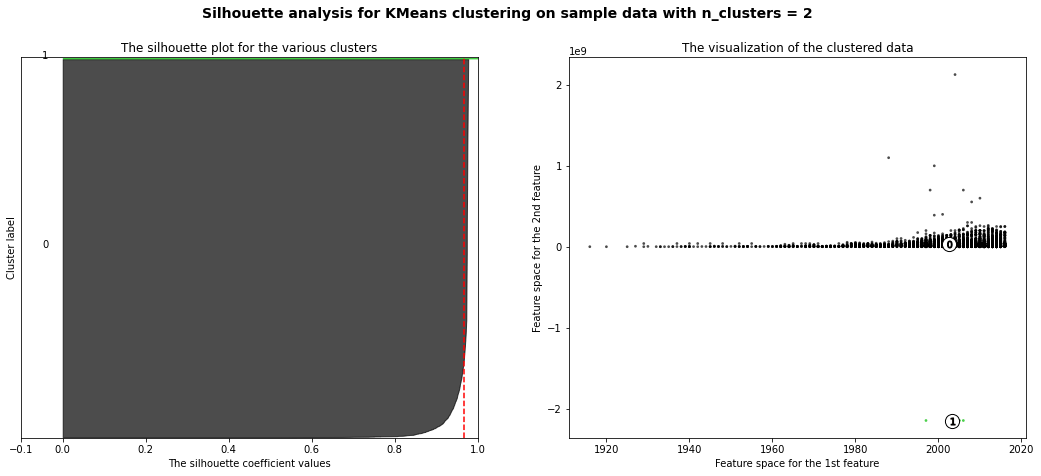

For n_clusters = 3 The silhouette_score is : 0.7180546612899457


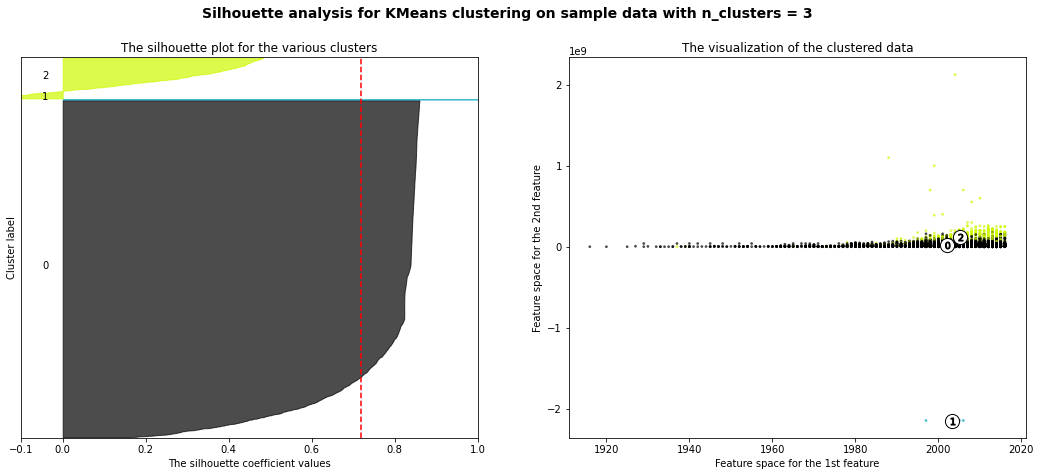

For n_clusters = 4 The silhouette_score is : 0.7103668395094697


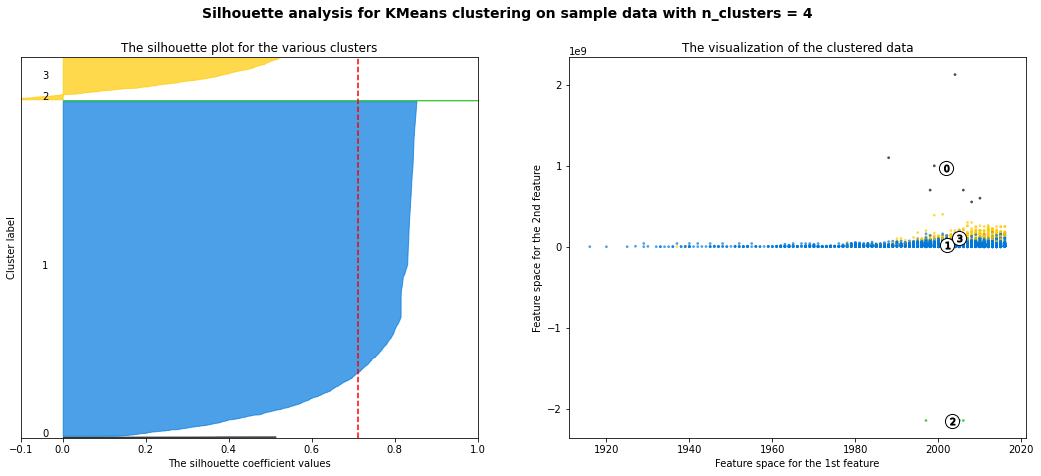

For n_clusters = 5 The silhouette_score is : 0.5862307759411423


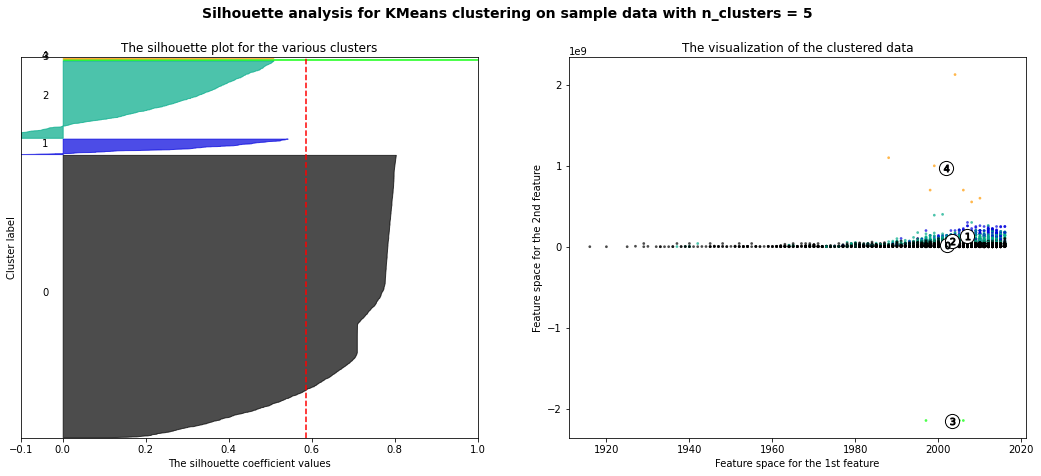

For n_clusters = 6 The silhouette_score is : 0.5054382486231094


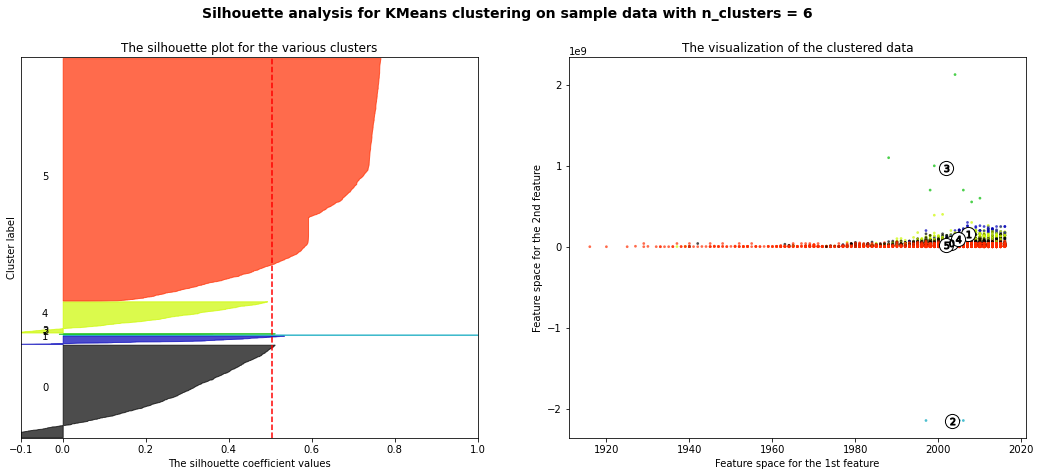

In [28]:
# Using silhouette score to find the best value of clustering from k=2 to k=6.

# imports and setup 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# A list of clusters to be tested
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot. The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples. This gives a perspective into the density and separation
    # of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values =\
        sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # Clear the yaxis labels / ticks
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight="bold")
    plt.show()
    
    
# As we can see, the best silhouette score is 0.71 for k=2, meaning, 2 different clusters. 

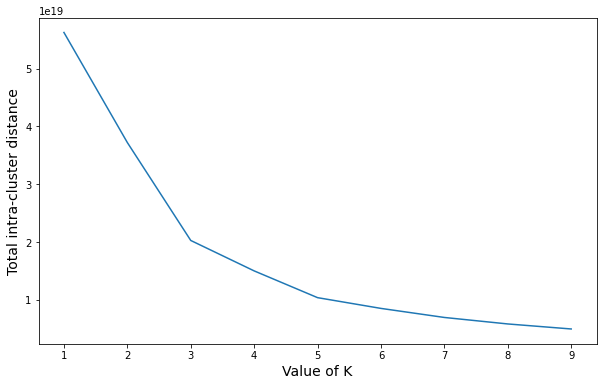

In [29]:
# Clustering from k = 1 to k = 10 for searching the best value
ks = range(1, 10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    scores.append(-model.score(X))

    # View in a scatter
plt.figure(figsize=(10, 6))
plt.plot(ks, scores)
plt.ylabel("Total intra-cluster distance", fontsize=14)
plt.xlabel("Value of K", fontsize=14)
plt.show()

# As we can see that, the total intra-cluster distance is large for k=1 and decreases as we increase k value, until k=2, 
# after which it tapers off and gets only marginally smaller. This indicates that k=2 is a good choice.


In [81]:
pip install -U flask-cors

In [83]:
pip install recommendation

Note: you may need to restart the kernel to use updated packages.


In [85]:
app = Flask(__name__)
CORS(app) 
        
@app.route('/movie', methods=['GET'])
def recommend_movies():
    res = recommendation.results(request.args.get('title'))
    return jsonify(res)

if __name__=='__main__':
    app.run(port = 5000, debug = True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

D:\TISU\1_TISU\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
